In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

In [3]:
reviews = pd.read_csv("data/arik_reviews.csv")

In [4]:
reviews.sample(5)

,reviews
1393,✅ Verified Review | Flew Lagos to Dakar. I ar...
1576,Arrived at Cotonou airport for flight from Cot...
802,✅ Trip Verified | Accra to Monrovia. This is a...
397,2 days ago I was in Lagos. There was already a...
132,2 days ago I was in Lagos. There was already a...


In [5]:
reviews["reviews"].sample().values

array(["Return flight from Lagos Nigeria to London 13th July 2013. Departure was 3pm but didn't take off until 7pm. No information or explanation provided. Things got unbearable. Eventually staff advised the delay was due to lack of aviation fuel. This only angered passengers even more as it was clear this was a lie and has now become the airline's only excuse for delayed flights! Destination was meant to be London Heathrow but was informed just 20 mins to landing that it would be Gatwick. At this point there was no holding back the passengers (most of which had young children) and most refused to come down from the plane until provisions were made to get all to Heathrow."],
      dtype=object)

Extracting Verified Trips

In [6]:
def verified(text):
    if "|" in text:
        return text.split("|")[1]
    else:
        return text

In [7]:
reviews["reviews"] = reviews["reviews"].apply(verified)

Data Preprocessing

In [8]:
reviews.nunique()

reviews    53
dtype: int64

In [9]:
reviews.drop_duplicates(inplace=True)

In [10]:
import re

In [11]:
reviews["reviews_processed"] = reviews["reviews"].map(lambda x: re.sub("[,\.!?’'()]", "", x.strip()))

In [12]:
reviews["reviews_processed"].sample().values

array(['2 days ago I was in Lagos There was already an 8 hour layover before I boarded this plane to JFK our boarding passes said we were to board at 930 pm and depart at 1130 pm 930 passed 1030 passed No updates as to why we were all sitting there not being attended to A few minutes past 11 a female employee comes and tells a few people that our plane was indeed "faulty" Then she proceeds to say the next flight was not leaving until 1030pm the following night Some time went by and a male employee comes and gives us several different messages while on the phone being followed around by passengers he tells us the next flight will leave by 130 am long story short our original departure date of 1130 pm turned out to actually be after 3 am Bad customer service on the flight not organized in the airport - overall just a bad experience I will not recommend Arik Air'],
      dtype=object)

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
stop_words = stopwords.words("english")
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Q1: What are the most common words?

In [15]:
from wordcloud import WordCloud

In [16]:
combined_words = ",".join(list(reviews["reviews_processed"].values))

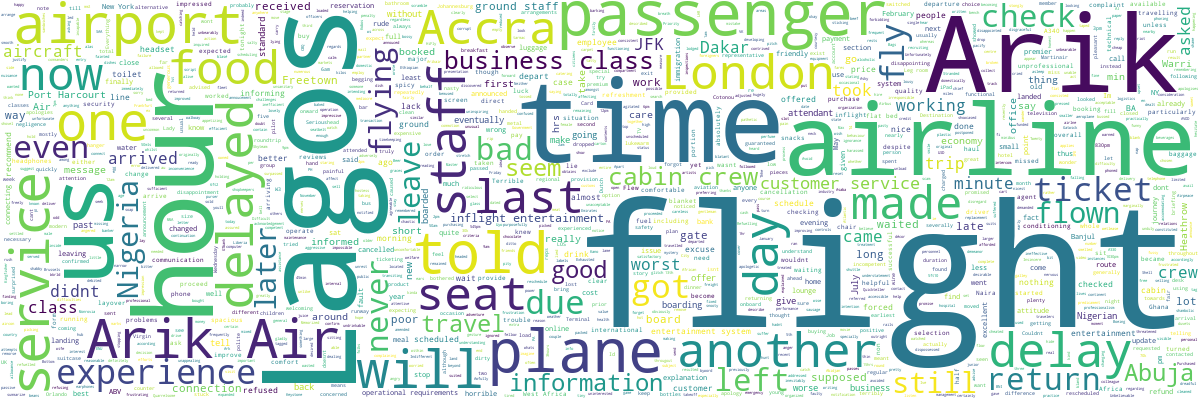

In [17]:
cloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color="steelblue", width=1200, height=400, random_state=51)
cloud.generate(combined_words)
cloud.to_image()

Q2: What is the distribution of Positive, Neutral, Negative Reviews?

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
vader = SentimentIntensityAnalyzer()

In [20]:
# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']
reviews['compound'] = reviews['reviews'].apply(function)

In [21]:
reviews

,reviews,reviews_processed,compound
0,Worst airline in Nigeria. Terrible service d...,Worst airline in Nigeria Terrible service deli...,-0.9423
1,I am quite accommodating as a person and I h...,I am quite accommodating as a person and I hav...,-0.9805
2,The shuttle bus dropped us the passengers at...,The shuttle bus dropped us the passengers at t...,-0.9807
3,I booked Arik flight from Lagos to Port Harc...,I booked Arik flight from Lagos to Port Harcou...,-0.9293
4,Lagos to Warri. Terrible. Last seat availabl...,Lagos to Warri Terrible Last seat available wa...,-0.9061
5,Lagos to Accra. From my experience today at A...,Lagos to Accra From my experience today at Ari...,-0.8402
6,Without any doubt the worst business class in...,Without any doubt the worst business class in ...,-0.9953
7,Accra to Monrovia. This is a terrible airline...,Accra to Monrovia This is a terrible airline A...,-0.8573
8,My colleague and I were booked on an Arik Air...,My colleague and I were booked on an Arik Air ...,-0.9455
9,I booked the earliest flight of the day out ...,I booked the earliest flight of the day out of...,-0.8810


In [22]:
def sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

reviews["sentiment"] = reviews["compound"].apply(sentiment)

In [23]:
reviews

,reviews,reviews_processed,compound,sentiment
0,Worst airline in Nigeria. Terrible service d...,Worst airline in Nigeria Terrible service deli...,-0.9423,Negative
1,I am quite accommodating as a person and I h...,I am quite accommodating as a person and I hav...,-0.9805,Negative
2,The shuttle bus dropped us the passengers at...,The shuttle bus dropped us the passengers at t...,-0.9807,Negative
3,I booked Arik flight from Lagos to Port Harc...,I booked Arik flight from Lagos to Port Harcou...,-0.9293,Negative
4,Lagos to Warri. Terrible. Last seat availabl...,Lagos to Warri Terrible Last seat available wa...,-0.9061,Negative
5,Lagos to Accra. From my experience today at A...,Lagos to Accra From my experience today at Ari...,-0.8402,Negative
6,Without any doubt the worst business class in...,Without any doubt the worst business class in ...,-0.9953,Negative
7,Accra to Monrovia. This is a terrible airline...,Accra to Monrovia This is a terrible airline A...,-0.8573,Negative
8,My colleague and I were booked on an Arik Air...,My colleague and I were booked on an Arik Air ...,-0.9455,Negative
9,I booked the earliest flight of the day out ...,I booked the earliest flight of the day out of...,-0.8810,Negative


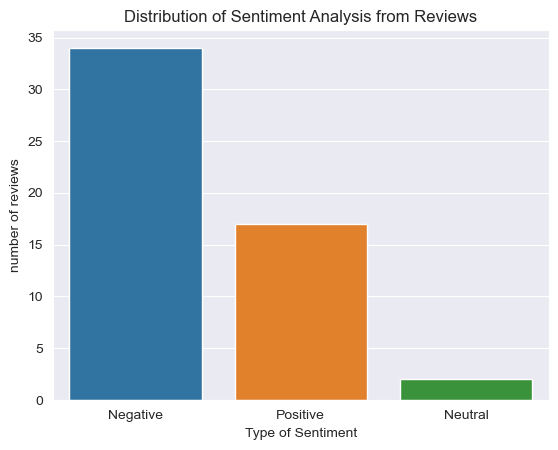

In [24]:
plt.title("Distribution of Sentiment Analysis from Reviews")
sns.countplot(x=reviews["sentiment"])

plt.xlabel("Type of Sentiment")
plt.ylabel("number of reviews");

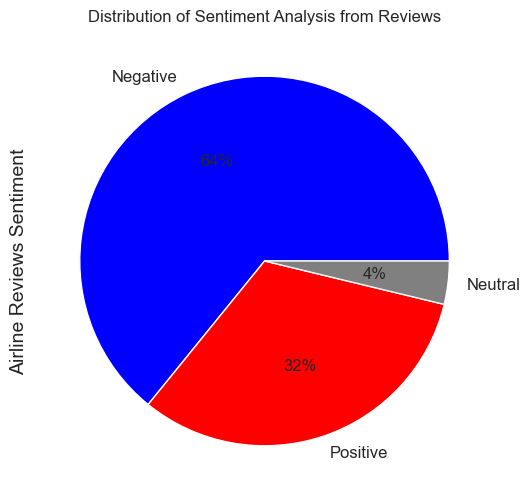

In [25]:
reviews["sentiment"].value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "grey"])
plt.title("Distribution of Sentiment Analysis from Reviews")
plt.ylabel("Airline Reviews Sentiment", size=14);

Q3: What are the most common words from the Positive Reviews?

In [26]:
stop_words.extend(["Lagos", "Arik", "flight", "London", "time", "Nigerian", "Arik air", "service", "Nigeria", "passenger", "hour", "us",       
                    "one", "airport", "air"])

In [27]:
positive = reviews[reviews["sentiment"] == "Positive"]
positive_words = ",".join(list(positive["reviews_processed"].values))

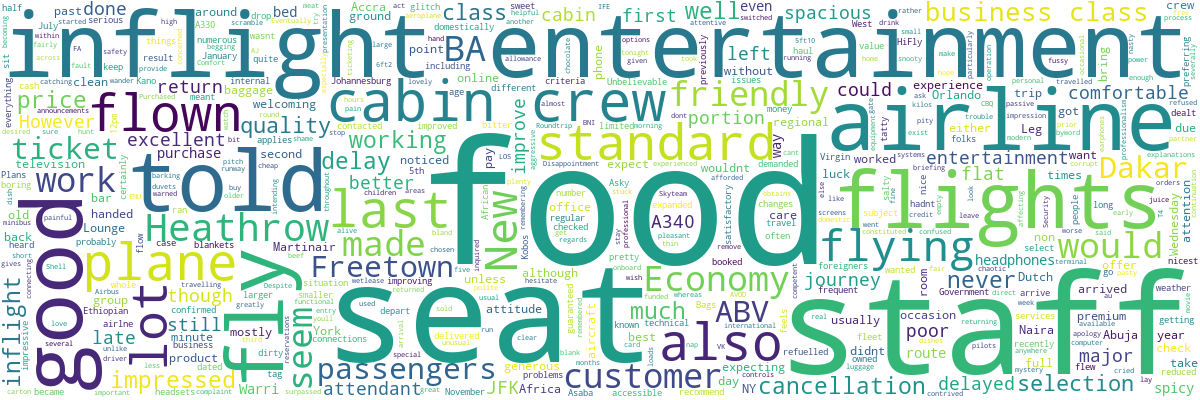

In [28]:
cloud = WordCloud(background_color="white", max_words=3000, contour_width=3, contour_color="steelblue", width=1200, height=400, stopwords=stop_words, random_state=51)
cloud.generate(positive_words)
cloud.to_image()

Q4: What are the most common words from the Neutral Reviews?

In [29]:
neutral = reviews[reviews["sentiment"] == "Neutral"]
neutral_words = ",".join(list(neutral["reviews_processed"].values))

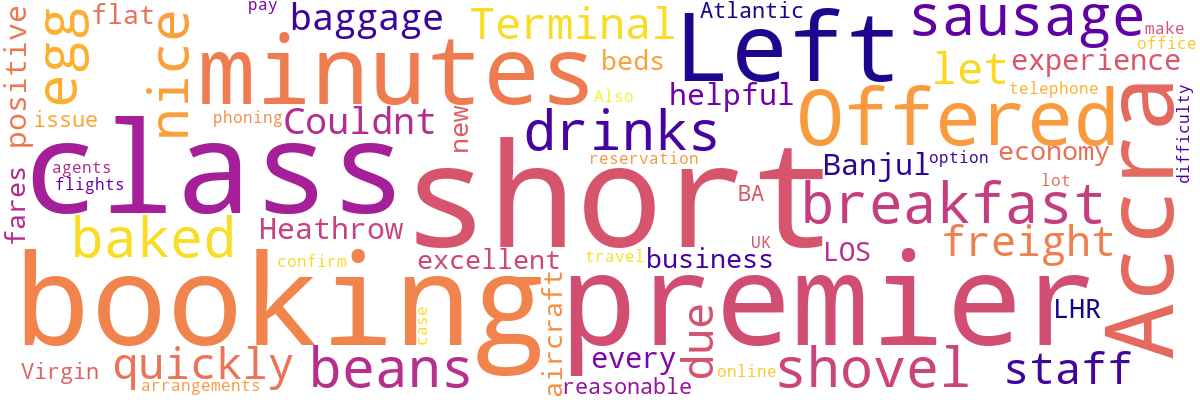

In [30]:
cloud = WordCloud(background_color="white", max_words=3000, contour_width=3, colormap="plasma", contour_color="steelblue", width=1200, height=400, stopwords=stop_words, random_state=51)
cloud.generate(neutral_words)
cloud.to_image()

Q4: What are the most common words from the Negative Reviews?

In [31]:
negative = reviews[reviews["sentiment"] == "Negative"]
negative_words = ",".join(list(negative["reviews_processed"].values))

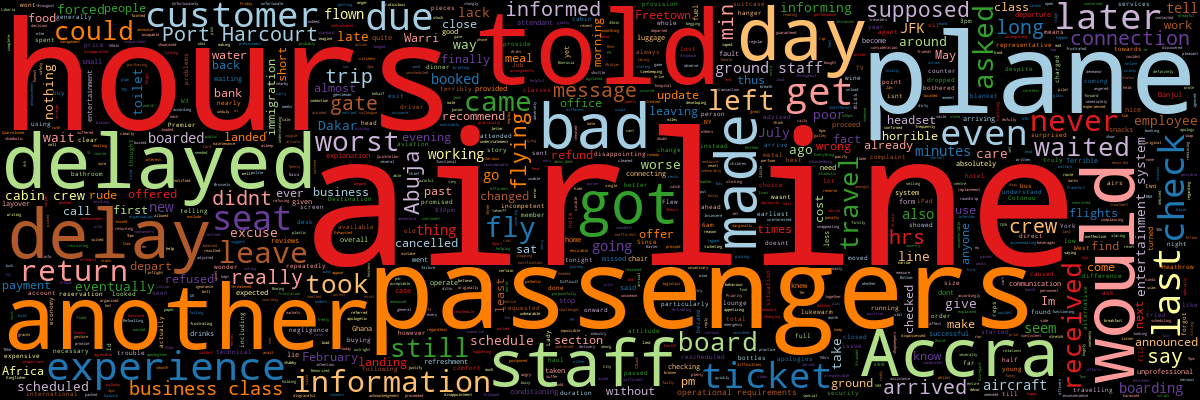

In [32]:
cloud = WordCloud(background_color="black", max_words=3000, contour_width=3, colormap="Paired_r", contour_color="steelblue", width=1200, height=400, stopwords=stop_words, random_state=51)
cloud.generate(negative_words)
cloud.to_image()

Most Positive Review

In [33]:
reviews["compound"].max()

0.9708

In [34]:
reviews[reviews["compound"] == reviews["compound"].max()]["reviews"].sample().values

array(['I have just returned from a trip to Lagos Nigeria in Economy Class from Heathrow. I can not fault the aeroplane there was lots of leg room (and my partner and I are not short at 5ft10 and 6ft2) good entertainment selection and plenty of food and drink throughout the journey. All the staff were welcoming and the plane was clean. My only complaint would be that both food options on the way out were spicy Nigerian dishes (but this is only because I am fussy if you like spicy food you will love the selection) however on the way back there was a non spicy dish which was lovely. I would not hesitate to fly with Arik again.'],
      dtype=object)

Most Negative Review

In [35]:
reviews["compound"].min()

-0.9953

In [36]:
reviews[reviews["compound"] == reviews["compound"].min()]["reviews"].sample().values

array([' Without any doubt the worst business class in Africa. Everything was wrong. Even with a most expensive business class ticket, I was requested to be at the very small and terribly mediocre Freetown airport 2 hours ahead of the flight: when one knows how few flights there are per day, ridiculous. When I checked in I was guaranteed that the flight had taken off from Accra where it came from and was due on time in Freetown, when I checked later with the crew, I found out it was a total lie as the flight was delayed and it was still on the ground at that time. When I checked in, I also asked about the business lounge and was told that of course I could use it, but after immigration I discovered it had been closed and remained closed for the 3 hours I waited: one of the shopkeepers nearby told me that the staff looking after the lounge had left because "they had other things to do". So I had to wait on the most uncomfortable metal bench with no air conditioning for 3 hours, nothing 

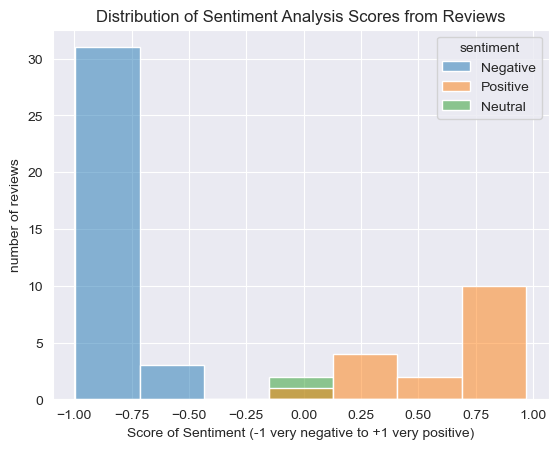

In [37]:
plt.title("Distribution of Sentiment Analysis Scores from Reviews")
sns.histplot(data=reviews, x="compound", hue="sentiment")

plt.xlabel("Score of Sentiment (-1 very negative to +1 very positive)")
plt.ylabel("number of reviews");